Epoch 0, Error: 0.499981727428358
Epoch 1000, Error: 0.4999683314384197
Epoch 2000, Error: 0.4999080363528602
Epoch 3000, Error: 0.49975809450104414
Epoch 4000, Error: 0.4991959749578486
Epoch 5000, Error: 0.49603851353862216
Epoch 6000, Error: 0.4720471352522382
Epoch 7000, Error: 0.40082114122196577
Epoch 8000, Error: 0.2834158740945963
Epoch 9000, Error: 0.14862038563996355
Predicted Output:
[[0.09900777]
 [0.90111879]
 [0.90100268]
 [0.11172099]]


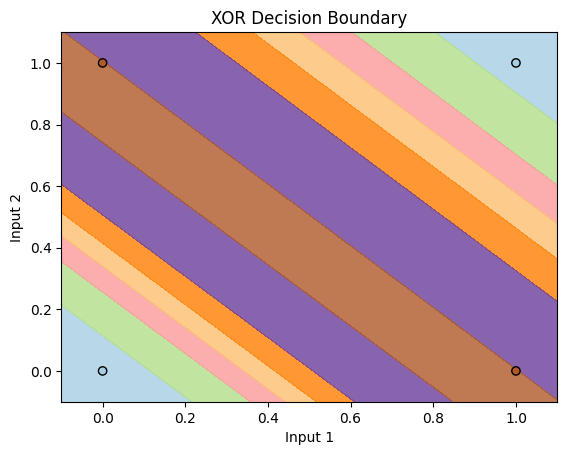

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# XOR dataset
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([[0],
              [1],
              [1],
              [0]])

# Initialize weights and biases
input_size = 2
hidden_size = 2
output_size = 1

W1 = np.random.uniform(size=(input_size, hidden_size))
b1 = np.random.uniform(size=(1, hidden_size))
W2 = np.random.uniform(size=(hidden_size, output_size))
b2 = np.random.uniform(size=(1, output_size))

# Hyperparameters
learning_rate = 0.1
epochs = 10000

# Training loop
for epoch in range(epochs):
    # Forward propagation
    hidden_input = np.dot(X, W1) + b1
    hidden_output = sigmoid(hidden_input)
    output_input = np.dot(hidden_output, W2) + b2
    predicted_output = sigmoid(output_input)
    
    # Calculate error
    error = y - predicted_output
    
    # Backpropagation
    d_output = error * sigmoid_derivative(predicted_output)
    error_hidden = d_output.dot(W2.T)
    d_hidden = error_hidden * sigmoid_derivative(hidden_output)
    
    # Update weights and biases
    W2 += hidden_output.T.dot(d_output) * learning_rate
    b2 += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    W1 += X.T.dot(d_hidden) * learning_rate
    b1 += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate
    
    # Print the error every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Error: {np.mean(np.abs(error))}")

# Test the model
hidden_input = np.dot(X, W1) + b1
hidden_output = sigmoid(hidden_input)
output_input = np.dot(hidden_output, W2) + b2
predicted_output = sigmoid(output_input)

print("Predicted Output:")
print(predicted_output)

# Create a mesh grid
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the output for each point in the mesh grid
grid_input = np.c_[xx.ravel(), yy.ravel()]
hidden_input = np.dot(grid_input, W1) + b1
hidden_output = sigmoid(hidden_input)
output_input = np.dot(hidden_output, W2) + b2
Z = sigmoid(output_input)
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.Paired)
plt.title('XOR Decision Boundary')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.show()